In [162]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

## GBDT 原理
-回归模拟

In [163]:
from sklearn.tree import DecisionTreeRegressor

## 构建数据

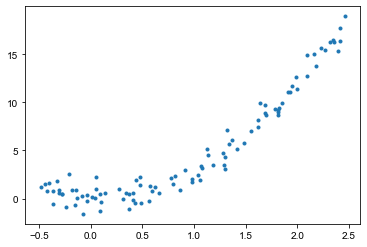

In [164]:
np.random.seed(42)
X = np.random.rand(100,1)*3 - 0.5
y = 3 * X.flatten()**2 + np.random.randn(100)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
plt.plot(X,y,'.')

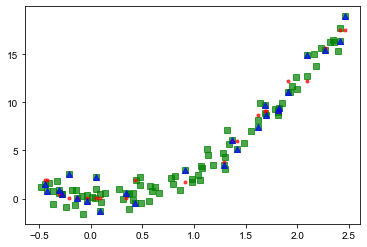

In [171]:
# GBDT类的实现 -- 简单版本
class GBDT(object):
    def __init__(self, n_estimators = 4, max_depth=3):
        self.clf_list = [DecisionTreeRegressor(max_depth=max_depth) for _ in range(n_estimators)]
        
    def fit(self,X,y):
        for clf in self.clf_list:
            clf.fit(X, y)
            y = y - clf.predict(X)
            
        return self
    
    def predict(self,X):
        return sum(clf.predict(X) for clf in self.clf_list)

gbdt = GBDT(3)
gbdt.fit(X_train, y_train)
y_pre_gbdt = gbdt.predict(X_test)

plt.plot(X,y,'gs',label="total data", alpha=0.7)
plt.plot(X_test, y_pre_gbdt, 'r.', label="prediction", alpha=0.7)
plt.plot(X_test, y_test, 'b^', label="test data", alpha=0.7)

## 集成和非集成对比

In [166]:
# 决策边界函数
#from matplotlib.colors import ListedColormap
def decision_boundary_regression(clf, X, y, axis=[0,2.5,0,20], xlabel="x", ylabel="y", style="r-",
                                 plot_training = True, data_style="b.", title="decision_boundary"):
    if plot_training:
        plt.plot(X, y, data_style)
    
    x1 = np.linspace(axis[0], axis[1], 100).reshape(-1,1)
    y1 = clf.predict(x1)
    plt.plot(x1, y1, style)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis(axis)
    plt.title(title)

In [167]:
# 集成
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pre_gbdt)

1.4669146097139218

In [168]:
# 非集成
clf_single = DecisionTreeRegressor(max_depth=2)
y_pre_single = clf_single.fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, y_pre_single)

2.6965498815048377

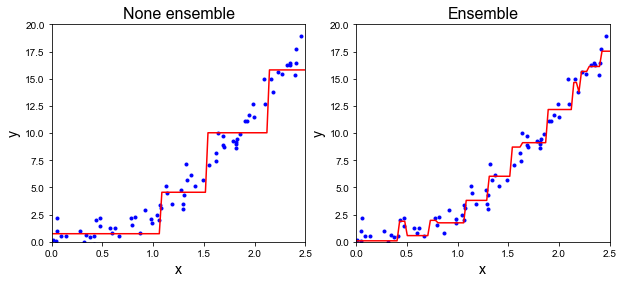

In [169]:
plt.figure(figsize=(10,4))
plt.subplot(121)
decision_boundary_regression(clf_single, X, y, title="None ensemble")
plt.subplot(122)
decision_boundary_regression(gbdt, X, y, title="Ensemble")

## 不同集成数目对比

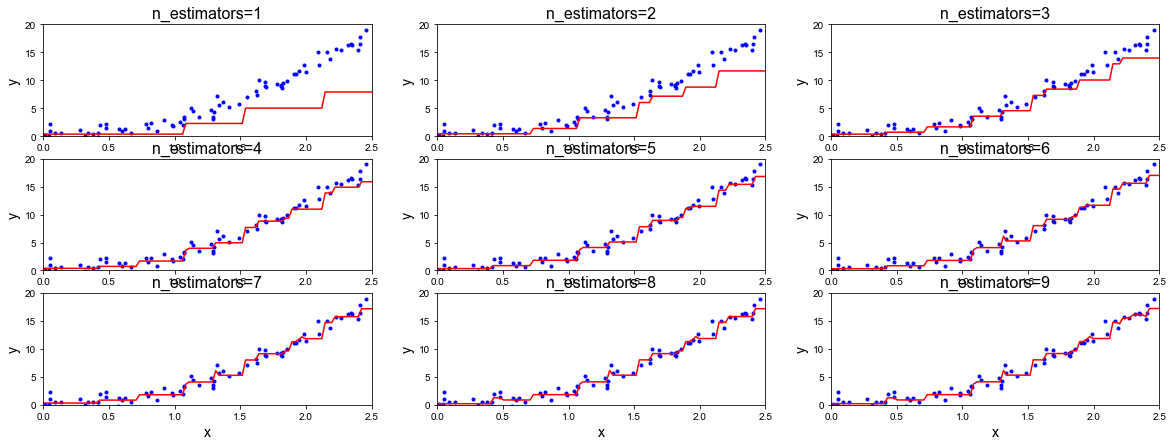

In [180]:
# 训练
n_estimators_list = [i for i in range(1,10,1)]
gbdt_list = [GBDT(n_estimators=i,max_depth=2).fit(X_train,y_train) for i in n_estimators_list]

# 绘图
plt.figure(figsize=(20,7))
for index,gbdt in enumerate(gbdt_list):
    plt.subplot(3,3,index+1)
    decision_boundary_regression(gbdt, X, y, title=f"n_estimators={n_estimators_list[index]}")

## GBDT类的实现

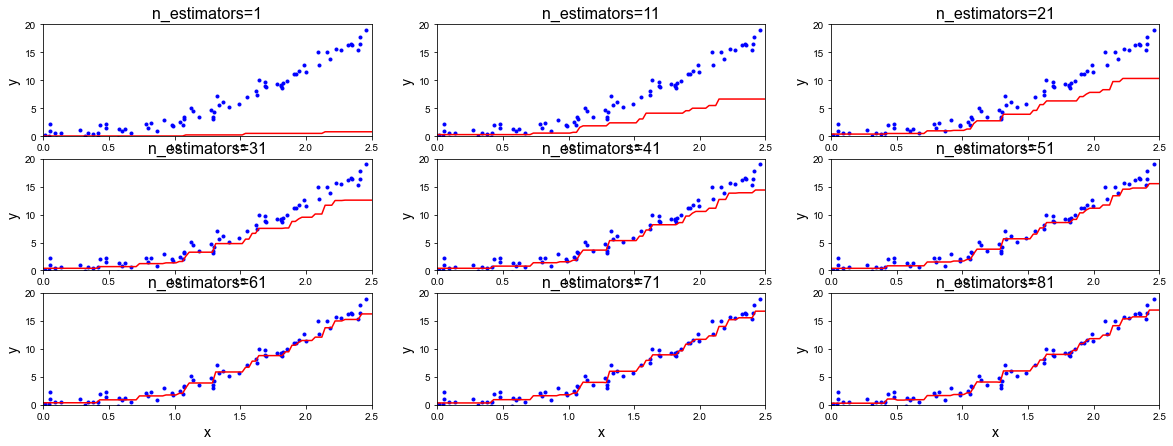

In [181]:
# GBDT类的实现 -- 进阶版 -- 带学习率
class GBDT(object):
    def __init__(self, n_estimators = 4, max_depth=3, learning_rate=0.5):
        self.clf_list = [DecisionTreeRegressor(max_depth=max_depth) for _ in range(n_estimators)]
        self.learning_rate = learning_rate
        
    def fit(self,X,y):
        for clf in self.clf_list:
            clf.fit(X, y)
            y = y - self.learning_rate * clf.predict(X)
            
        return self
    
    def predict(self,X):
        return sum(self.learning_rate*clf.predict(X) for clf in self.clf_list)
    
# 训练
n_estimators_list = [i for i in range(1,90,10)]
gbdt_list = [GBDT(n_estimators=i,max_depth=2,learning_rate=0.05).fit(X_train,y_train) for i in n_estimators_list]

# 绘图
plt.figure(figsize=(20,7))
for index,gbdt in enumerate(gbdt_list):
    plt.subplot(3,3,index+1)
    decision_boundary_regression(gbdt, X, y, title=f"n_estimators={n_estimators_list[index]}")

## 导入sklearn包
sklearn.ensemble.GradientBoostingRegressor
默认用回归树集成

In [184]:
from sklearn.ensemble import GradientBoostingRegressor

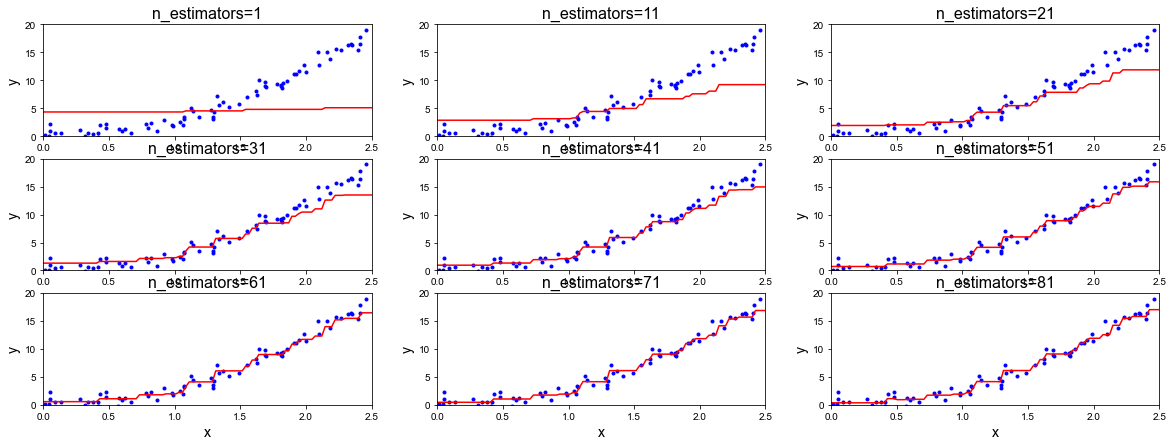

In [187]:
# 训练
n_estimators_list = [i for i in range(1,90,10)]
gbrt_list = [GradientBoostingRegressor(n_estimators=i,max_depth=2,learning_rate=0.05).fit(X_train,y_train) for i in n_estimators_list]

# 绘图
plt.figure(figsize=(20,7))
for index,gbrt in enumerate(gbrt_list):
    plt.subplot(3,3,index+1)
    decision_boundary_regression(gbrt, X, y, title=f"n_estimators={n_estimators_list[index]}")